# Capestone Project - Coursera IBM Professional Certificate Course 9

## 0. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

## 1. Reading and going through the Data

Reading the .csv file using Pandas .read_csv method

In [2]:
df = pd.read_csv('Data_Collisions.csv')

C:\Users\ranas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Checking the Data

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Checking the number of Rows and column

In [4]:
df.shape

(194673, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

## 2. Data Cleaning

Checking number of empty cell in each column with .isnull method

In [6]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

##### In above output we see many columns having a large number of missing value. In next step we drop such columns.

In [7]:
df = df.drop(['INTKEY','EXCEPTRSNCODE', 'EXCEPTRSNDESC','SPEEDING','SDOTCOLNUM','PEDROWNOTGRNT',
              'INATTENTIONIND'],axis=1)

In [8]:
df.shape

(194673, 31)

### 2.1 Dropping Irrelevant Columns

In [9]:
df = df.drop(['X','Y','OBJECTID','INCKEY','LOCATION','COLDETKEY','REPORTNO','STATUS','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','ST_COLCODE',
              'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)

Dropping repeated column

In [10]:
df = df.drop('SEVERITYCODE.1', axis=1)

Dropping inconsistant data

In [11]:
df = df.drop('UNDERINFL', axis=1)

### 2.2 Selecting the feature set

Checking the data frame again to see remaining column. These will our features or selected independent variables.

In [12]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Overcast,Wet,Daylight,N
1,1,Block,Sideswipe,2,0,0,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,N
2,1,Block,Parked Car,4,0,0,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,N
3,1,Block,Other,3,0,0,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,N
4,2,Intersection,Angles,2,0,0,2,At Intersection (intersection related),Raining,Wet,Daylight,N


### 2.3 Looking for unique values in categorical data column

The columns ADDTYPE, COLLISIONTYPE, JUNCTIONTYPE, WEATHER, LIGHTCOND, ROADCOND and HITPARKEDCAR are categorical variables and rest are numeric variables

In [13]:
df["ADDRTYPE"].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [14]:
df["COLLISIONTYPE"].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [15]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [16]:
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

Visualizing the weather vs. no. of accidents

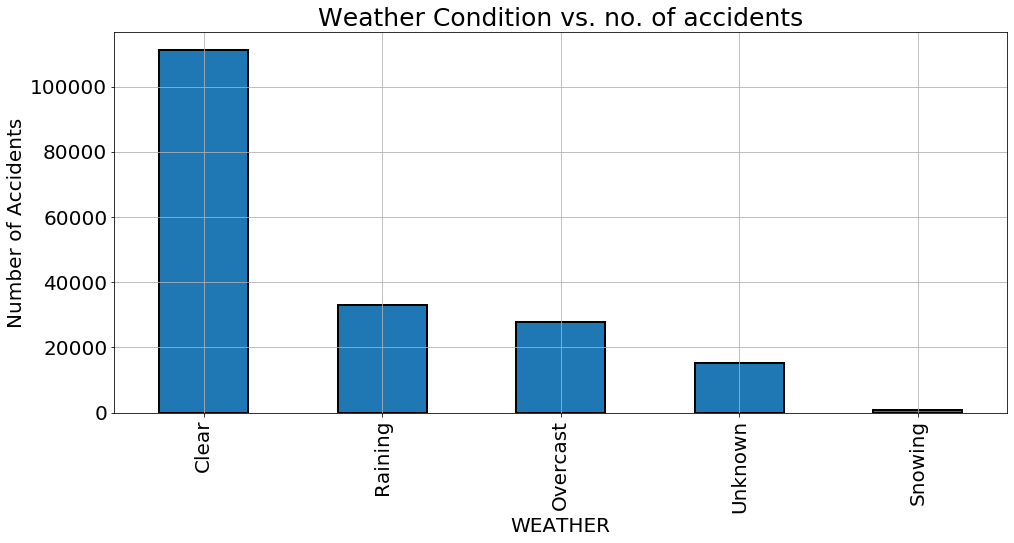

In [17]:
fig, ax=plt.subplots(figsize=(16,7))
df['WEATHER'].value_counts().sort_values(ascending=False).head().plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('WEATHER',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('Weather Condition vs. no. of accidents',fontsize=25)
plt.grid()
plt.ioff()

In [18]:
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [19]:
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64



Here we see that many columns has values such as 'Other' or 'Unknown'. Such value has no relevence and can create problem while training a model. 
In next step these values are replaced with NaN (not a number) and then the data with NaN values are droped with .dropna() method.

In [20]:
# we replace the Others and Unknown with NaN
df.replace("Other", np.nan, inplace = True)
df.replace(r'^\s*$', np.nan, regex=True)

# then let us be sure to also replace emply or white spaces with NaN
df.replace("Unknown", np.nan, inplace = True)

Let us check once more which columns has missing values

In [21]:
df.isnull().sum()

SEVERITYCODE         0
ADDRTYPE          1926
COLLISIONTYPE    28607
PERSONCOUNT          0
PEDCOUNT             0
PEDCYLCOUNT          0
VEHCOUNT             0
JUNCTIONTYPE      6338
WEATHER          21004
ROADCOND         20222
LIGHTCOND        18878
HITPARKEDCAR         0
dtype: int64

### 2.4 Drop the missing values

In [22]:
df.dropna(subset=["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND"], axis=0, inplace=True)

In [23]:
df.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

We see that there are no missing values

In [24]:
df.shape

(145369, 12)

## 3. Data Formating

We can visualize the distribution of the values for our dependent variable 'severitycode'.

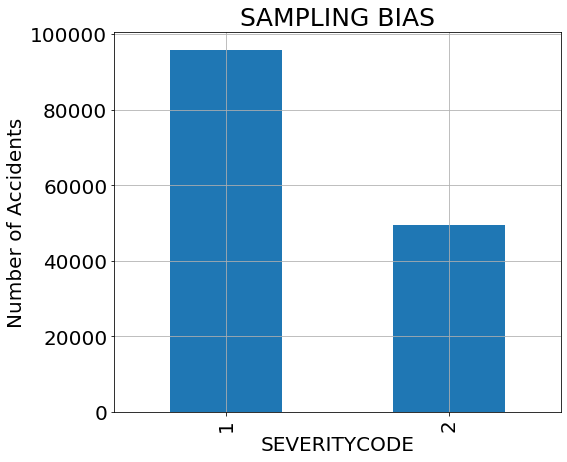

In [25]:
fig, ax=plt.subplots(figsize=(8,7))
df['SEVERITYCODE'].value_counts().sort_values(ascending=False).head().plot.bar(width=0.5,align='center',linewidth=2)
plt.xlabel('SEVERITYCODE',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('SAMPLING BIAS',fontsize=25)
plt.grid()
plt.ioff()

We see that value 1s is almost twice than that of 2s.

In [26]:
df['SEVERITYCODE'].value_counts()

1    95921
2    49448
Name: SEVERITYCODE, dtype: int64

### 3.1 Seperating the dependent and independent variables

In [27]:
Pre_y = df["SEVERITYCODE"]

In [28]:
Pre_y.head()

0    2
1    1
2    1
4    2
5    1
Name: SEVERITYCODE, dtype: int64

In [29]:
NonDummies_X = df[["PERSONCOUNT", "PEDCOUNT", "PEDCYLCOUNT", "VEHCOUNT"]]

In [30]:
NonDummies_X.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
0,2,0,0,2
1,2,0,0,2
2,4,0,0,3
4,2,0,0,2
5,2,0,0,2


### 3.2 On hot encoding

Converting categorical values into numeric variavle using .getdummies method

In [31]:
df_dummies = pd.get_dummies(df[["ADDRTYPE","COLLISIONTYPE","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND","HITPARKEDCAR"]])

In [32]:
Pre_X = pd.concat([NonDummies_X, df_dummies], axis=1)

In [33]:
Pre_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145369 entries, 0 to 194672
Data columns (total 47 columns):
 #   Column                                                          Non-Null Count   Dtype
---  ------                                                          --------------   -----
 0   PERSONCOUNT                                                     145369 non-null  int64
 1   PEDCOUNT                                                        145369 non-null  int64
 2   PEDCYLCOUNT                                                     145369 non-null  int64
 3   VEHCOUNT                                                        145369 non-null  int64
 4   ADDRTYPE_Alley                                                  145369 non-null  uint8
 5   ADDRTYPE_Block                                                  145369 non-null  uint8
 6   ADDRTYPE_Intersection                                           145369 non-null  uint8
 7   COLLISIONTYPE_Angles                                    

### 3.3 Balancing the values using imblearn library

Install and import the imblearn library

In [34]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [35]:
from imblearn.under_sampling import NearMiss

Creating two final dataset X and y for independent and dependent variables respectively using NearMiss method. This will balance the distribution of the data in SEVERITYCODE

In [36]:
nm = NearMiss()
X, y = nm.fit_sample(Pre_X,Pre_y)

Checking the values 

In [37]:
y.value_counts()

2    49448
1    49448
Name: SEVERITYCODE, dtype: int64

We can see the 1s and 2s are equal in SEVERITYCODE columns

### 3.4 Exploratory data Analysis

first of all we concat the cleaned data in a data frame

In [69]:
df_Xy = pd.concat([y, X])

We check the pearson correlation using .corr() method

In [70]:
df_Xy = df_Xy.corr()

In [76]:
df_Xy.corr()

,0,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection,COLLISIONTYPE_Angles,COLLISIONTYPE_Cycles,COLLISIONTYPE_Head On,COLLISIONTYPE_Left Turn,COLLISIONTYPE_Parked Car,COLLISIONTYPE_Pedestrian,...,VEHCOUNT,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRTYPE_Alley,NaN,1.000000,-0.008729,-0.005187,-0.007786,0.007802,-0.009195,-0.013229,-0.002208,0.074054,...,-0.063858,-0.022124,0.009421,-0.022389,-0.004202,-0.022869,-0.004514,-0.021970,-0.023631,-0.030974
ADDRTYPE_Block,NaN,-0.008729,1.000000,-0.999903,-0.786169,-0.146820,0.115608,-0.556653,0.689258,-0.290869,...,0.381316,-0.006966,0.092276,-0.029770,-0.029033,-0.006443,-0.092728,-0.001119,-0.021147,-0.013403
ADDRTYPE_Intersection,NaN,-0.005187,-0.999903,1.000000,0.786297,0.146715,-0.115483,0.556851,-0.689245,0.289845,...,-0.380437,0.007274,-0.092409,0.030083,0.029092,0.006761,0.092793,0.001425,0.021477,0.013834
COLLISIONTYPE_Angles,NaN,-0.007786,-0.786169,0.786297,1.000000,-0.064658,-0.094404,0.206893,-0.527588,-0.010976,...,-0.049549,0.014226,-0.106024,0.028208,0.039077,0.013284,0.102180,0.012160,0.026764,0.027292
COLLISIONTYPE_Cycles,NaN,0.007802,-0.146820,0.146715,-0.064658,1.000000,-0.061167,-0.037287,-0.166327,0.034351,...,-0.633143,-0.008267,0.091700,-0.020038,-0.015810,-0.015442,-0.099661,-0.014247,-0.021816,-0.034798
COLLISIONTYPE_Head On,NaN,-0.009195,0.115608,-0.115483,-0.094404,-0.061167,1.000000,-0.067686,0.032129,-0.063143,...,0.077092,-0.019510,-0.062848,-0.013826,0.007131,-0.018621,0.071471,-0.017652,-0.018496,0.064972
COLLISIONTYPE_Left Turn,NaN,-0.013229,-0.556653,0.556851,0.206893,-0.037287,-0.067686,1.000000,-0.358978,0.004817,...,-0.060238,0.002621,-0.053651,0.019578,0.018818,0.011102,0.053448,-0.001043,0.001850,-0.003694
COLLISIONTYPE_Parked Car,NaN,-0.002208,0.689258,-0.689245,-0.527588,-0.166327,0.032129,-0.358978,1.000000,-0.227072,...,0.308134,0.003020,0.145055,-0.016530,-0.043914,0.002063,-0.150442,0.004083,-0.005857,-0.008998
COLLISIONTYPE_Pedestrian,NaN,0.074054,-0.290869,0.289845,-0.010976,0.034351,-0.063143,0.004817,-0.227072,1.000000,...,-0.676343,-0.006636,-0.081140,0.014535,0.010226,-0.013483,0.092534,-0.012438,0.016924,0.013735


Visualize the correlation data using heatmap in seaborn library 

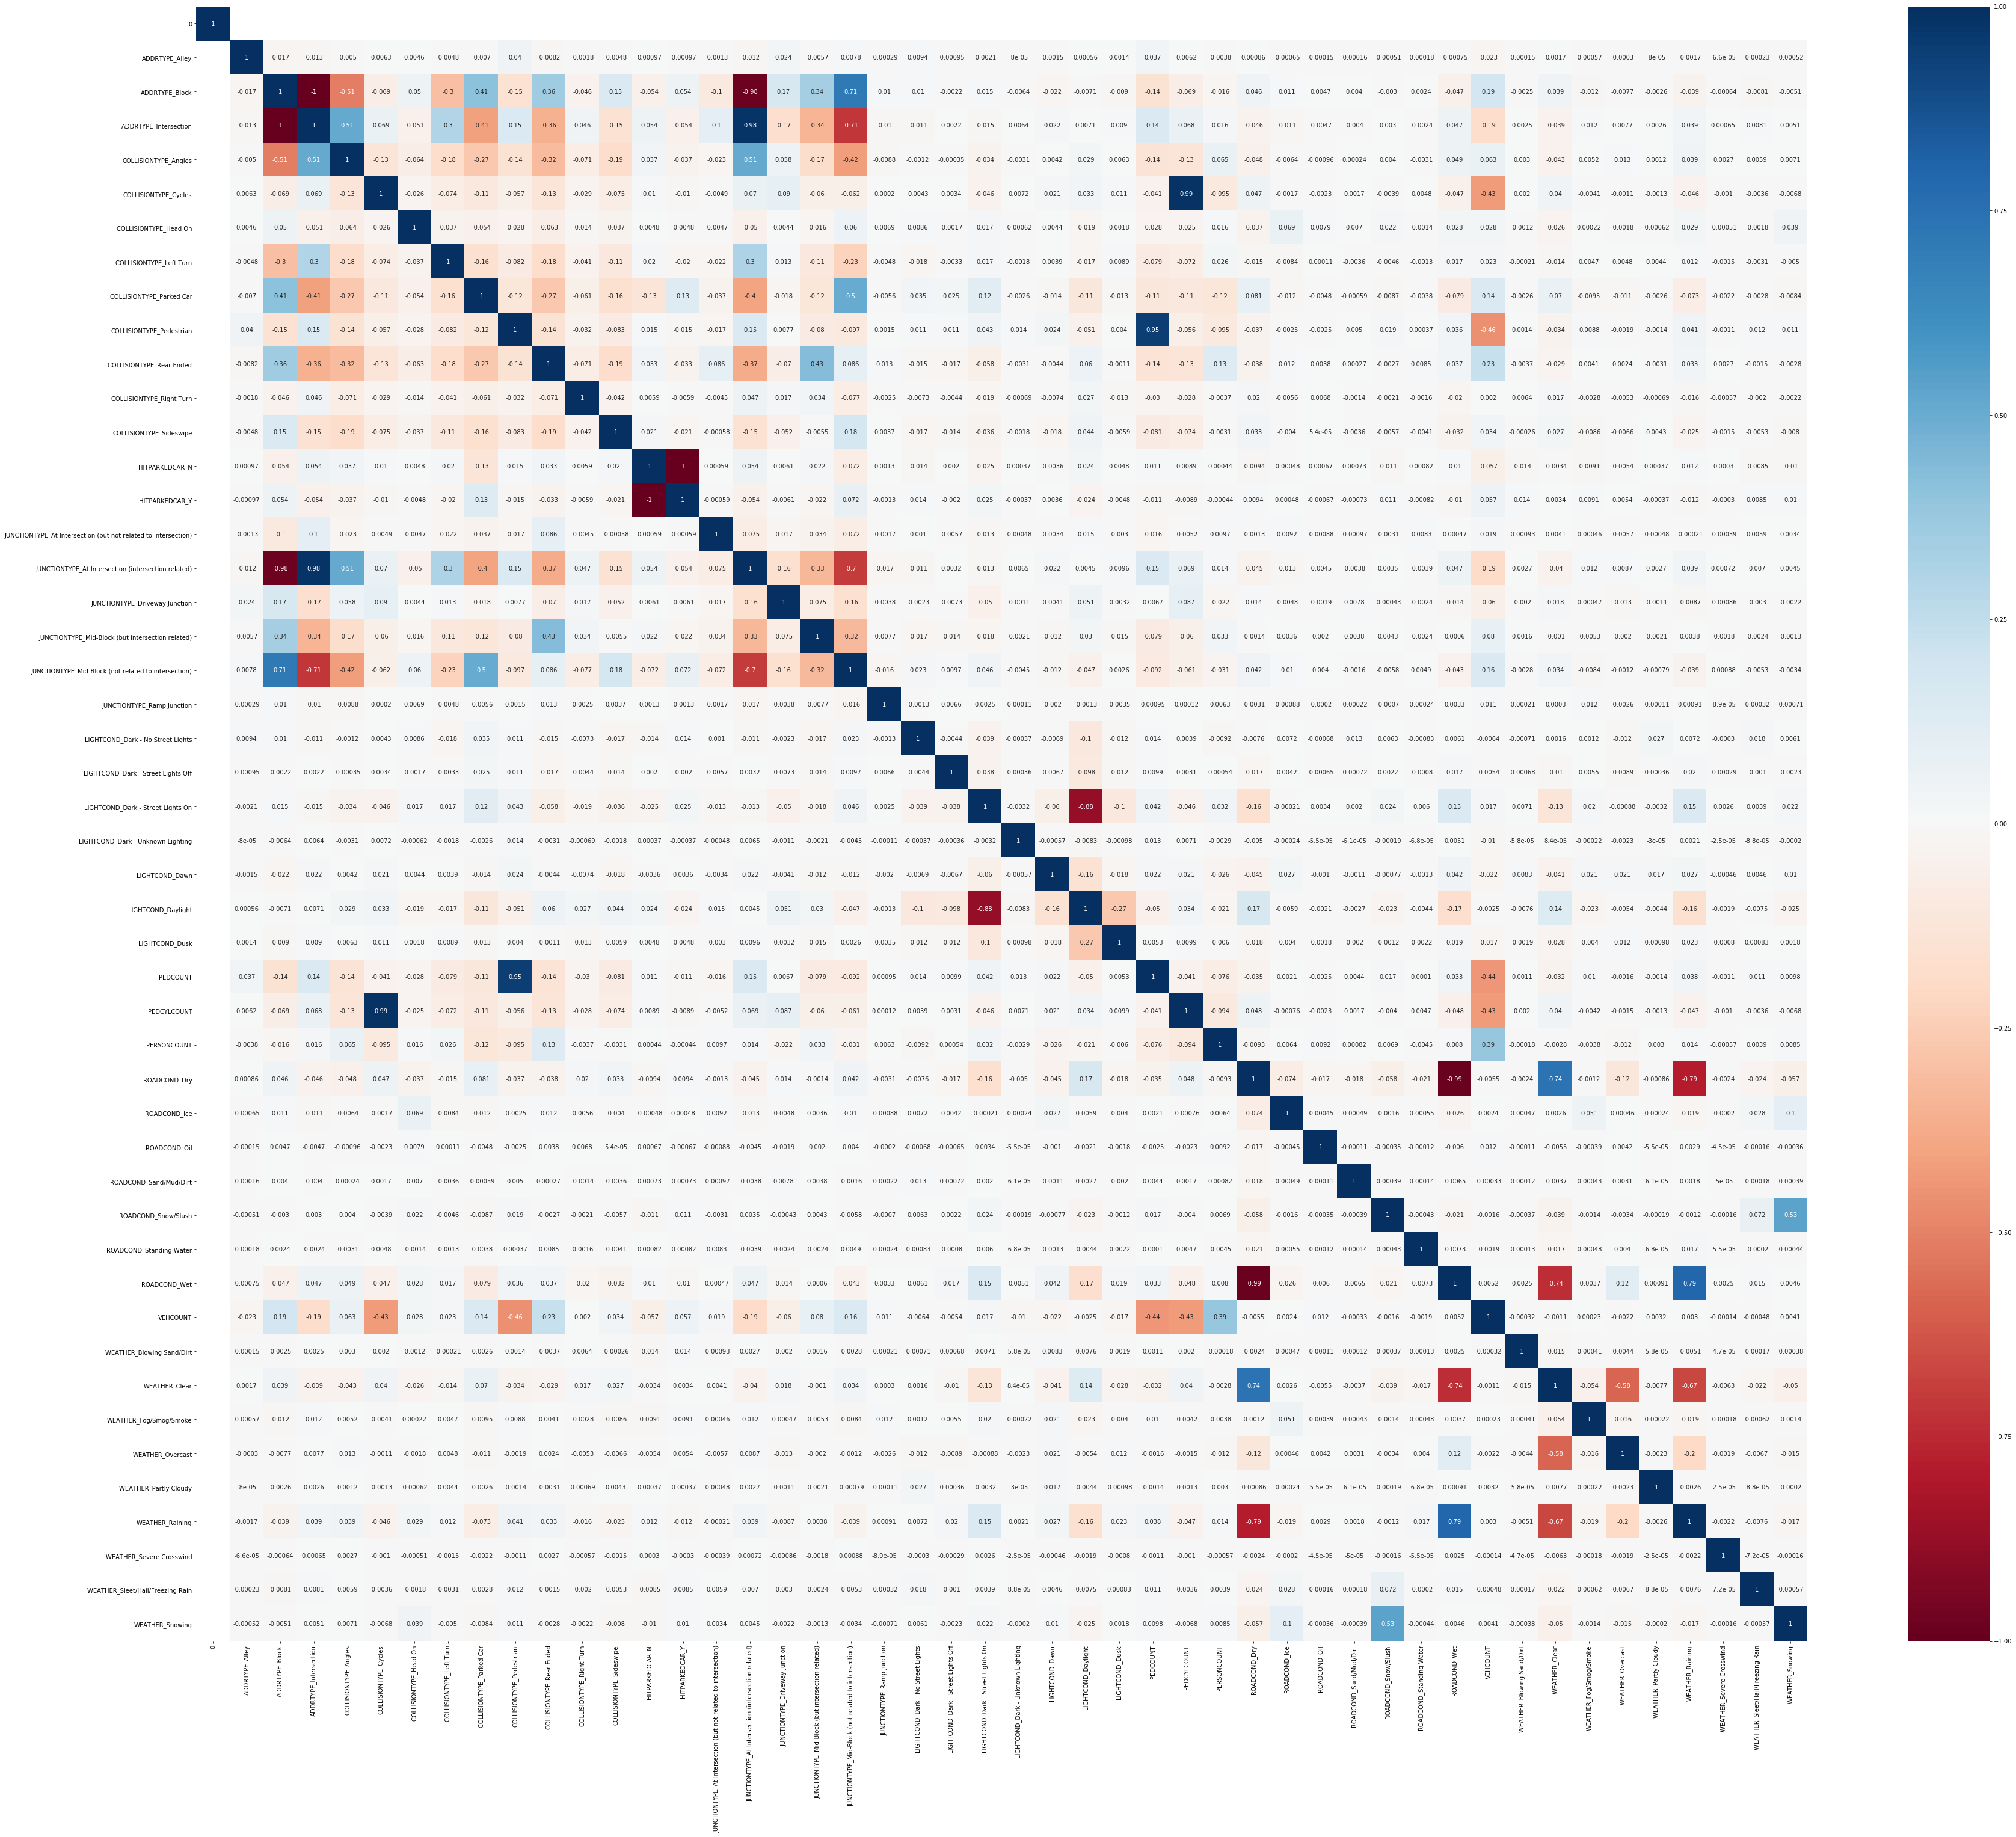

In [75]:
plt.figure(figsize=(60,50))
sns.heatmap(df_Xy,annot=True,cmap='RdBu')
plt.savefig('heatmap.png')

## 4. Data Normalization

Importing the important libraries

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import jaccard_score
from sklearn import svm

### 4.1 Splitting the data into training set and testing set

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (79116, 47) (79116,)
Test set: (19780, 47) (19780,)


In [41]:
X_train["PERSONCOUNT"].value_counts()

2     46682
3     17548
4      7398
5      3369
6      1445
0      1341
7       583
1       253
8       253
9       108
10       62
11       20
12       10
13        9
17        8
14        6
15        5
16        5
39        1
19        1
22        1
23        1
24        1
27        1
28        1
29        1
34        1
37        1
54        1
Name: PERSONCOUNT, dtype: int64

### 4.2 Data Standardization

Using standardscaler to achieve zero mean in the columns containing numeric data.

In [42]:
scaler = StandardScaler()
X_train[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(X_train[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

scaler = StandardScaler()
X_test[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']] = scaler.fit_transform(X_test[['PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT']])

C:\Users\ranas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ranas\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\ranas\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

Checking weather the numeric data is been standardized

In [43]:
X_train[0:5], X_test[0:5]

(       PERSONCOUNT  PEDCOUNT  PEDCYLCOUNT  VEHCOUNT  ADDRTYPE_Alley  \
 64828    -0.526871  -0.25154    -0.226811 -0.030713               0   
 22286     0.274728  -0.25154    -0.226811 -0.030713               0   
 47060    -0.526871  -0.25154    -0.226811 -0.030713               0   
 27048    -0.526871  -0.25154    -0.226811 -0.030713               0   
 50740    -0.526871  -0.25154    -0.226811 -0.030713               0   
 
        ADDRTYPE_Block  ADDRTYPE_Intersection  COLLISIONTYPE_Angles  \
 64828               1                      0                     0   
 22286               1                      0                     0   
 47060               1                      0                     0   
 27048               0                      1                     0   
 50740               0                      1                     1   
 
        COLLISIONTYPE_Cycles  COLLISIONTYPE_Head On  ...  ROADCOND_Wet  \
 64828                     0                      0  ...        

In [44]:
y_train.head()

64828    2
22286    1
47060    1
27048    1
50740    2
Name: SEVERITYCODE, dtype: int64

#### Checking the columns and their data type

X_train.info()

## 5. Modelling

We see that this problem is a classification problem. So we fit the our training data set to various classification algorithms and predict the outcome on the testing data set. Parallely we also evaluate the accuracy scores, f1 score and Jaccard similarity scores of selected model

### 5.1 KNN Classifier

Create a KNN object and fitting the data

In [45]:
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [46]:
yhat_knn = neigh.predict(X_test)
yhat_knn[0:5]

array([2, 1, 2, 1, 2], dtype=int64)

We evaluate the accuracy scores

In [47]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_knn))

Train set Accuracy:  0.7004145811213913
Test set Accuracy:  0.6853387259858443


Selection the the best K value

In [48]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_knn=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_knn)

    
    std_acc[n-1]=np.std(yhat_knn==y_test)/np.sqrt(yhat_knn.shape[0])

mean_acc

array([0.61577351, 0.65131446, 0.67012133, 0.66385238, 0.68210313,
       0.67330637, 0.68533873, 0.68255814, 0.69115268])

Visualizing best k value

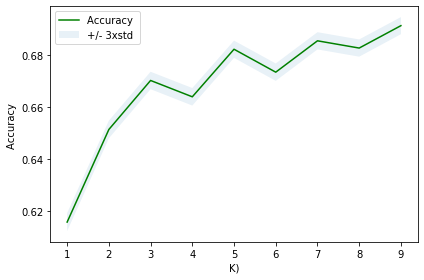

In [49]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('K)')
plt.tight_layout()
plt.show()

We select the best k = 7 as the best value of K and apply it when creating the KNN object 'neigh'.


We evaluate the jaccard similarity score for KNN model

In [50]:
jaccard_score(y_test, yhat_knn)

0.5024433946896889

We evaluate the f1 score for KNN model

In [51]:
f1_score(y_test, yhat_knn, average='weighted')

0.6898577849912421

### 5.2 Decision Tree Classifier

Create a Decision Tree object


In [52]:
DecTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

fitting the training data



In [53]:
DecTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

Predict the test value

In [54]:
yhat_DecTree = DecTree.predict(X_test)
yhat_DecTree[0:10]

array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2], dtype=int64)

we evaluate the jaccard score for Decision Tree

In [55]:
jaccard_score(y_test, yhat_DecTree)

0.41730805331330956

we evaluate the F1 score for Decision Tree

In [56]:
f1_score(y_test, yhat_DecTree, average='weighted')

0.6679655216111585

We evaluate the accuracy scores

In [57]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DecTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_DecTree))

Train set Accuracy:  0.6922746347135851
Test set Accuracy:  0.6861476238624874


### 5.3 Support Vector Machine

Create a SVM Object

In [58]:
clf = svm.SVC(kernel='rbf')

fit the training data set

In [59]:
clf.fit(X_train, y_train)

SVC()

In [60]:
yhat_clf = clf.predict(X_test)
yhat_clf [0:5]

array([2, 2, 1, 2, 1], dtype=int64)

We evaluate the jaccard similarity score for SVM model

In [61]:
jaccard_score(y_test, yhat_clf)

0.49437430215580175

We evaluate the f1 score for SVM model

In [62]:
f1_score(y_test, yhat_clf, average='weighted')

0.6981986713786499

We evaluate the accuracy scores

In [63]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, clf.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_clf))

Train set Accuracy:  0.7125107437180849
Test set Accuracy:  0.702376137512639


### 5.4 Logistic Regression

fitting the train data

In [64]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [65]:
yhat_LR = LR.predict(X_test)
yhat_LR[0:5]

array([2, 2, 1, 2, 1], dtype=int64)

We evaluate the jaccard similarity score for LR model

In [66]:
jaccard_score(y_test, yhat_LR)

0.47368421052631576

We evaluate the f1 score for LR model

In [67]:
f1_score(y_test, yhat_LR, average='weighted')

0.6815974534341299

We evaluate the accuracy scores

In [68]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, LR.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat_LR))

Train set Accuracy:  0.6960159765407755
Test set Accuracy:  0.686046511627907


## 6. Model Evaluation and Conclusion

Table below shows the Jaccard, F1 Score, Training accuracy and testing accuracy of above trained classifiaction models.

| Algorithm          | Jaccard | F1-score | Train set Accuracy |Test set Accuracy|
|--------------------|---------|----------|--------------------|-----------------|
| KNN                | 0.4884  | 0.6832   | 0.7004             | 0.6853          |
| Decision Tree      | 0.4173  | 0.6679   | 0.6922             | 0.6861          |
| SVM                | 0.4943  | 0.6981   | 0.7125             | 0.7023          |
| Logistic Regression| 0.4736  | 0.6815   | 0.6960             | 0.6860          |

#### From above results, it can be concluded that Support vector machine (SVM) model ha the best accuracy scores. In terms of model training time, i have observed that the Decision Tree and Logistic Regression algorithm are the fastest.